# PYCON 16: TEXT ANALYSIS

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Model Building in Scikit-Learn

In [288]:
from  sklearn.datasets import load_iris
iris = load_iris()

In [289]:
# Features
X = iris.data

# Target or the response
y = iris.target

In [290]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [291]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [292]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [293]:
# Showing the first 5 rows of X 

pd.DataFrame(X,columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [294]:
# Finding out the target vector

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [295]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the model
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [296]:
# Predict the response for this observation

knn.predict([[3,5,4,2]])

array([1])

### 2. Representing Text as Numerical Data

In [297]:
# Example text for a model training (SMS messages)

simple_train = ['call you tonight','call me a cab','please call me...PLEASE']

__We use__ ___CountVectorizer___ __to convert text into a matrix of token counts__

In [298]:
# Import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [299]:
# Learn the vocabulary of the training data

vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [300]:
# Examine the fitted vocabulary

vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [301]:
# Transform training data into a document-term matrix

simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [302]:
# Convert sparse matrix to a dense matrix

simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [303]:
pd.DataFrame(simple_train_dtm.toarray(),columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [304]:
type(simple_train_dtm)

scipy.sparse.csr.csr_matrix

In [305]:
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [306]:
# Example text for model testing

simple_test =["please don't call me"]

In order to ___make a prediction___, the new observation must have the same 

features as the training observations,both in number and meaning

In [307]:
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [308]:
pd.DataFrame(simple_test_dtm.toarray(),columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


The unknown words are gone!!!

_Summary:_

- vect.fit(train) learns the vocabulary of the training data
- vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data
- vect.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

### 3. Reading a text-based dataset into pandas

In [309]:
path = './pycon-2016-tutorial-master/data/sms.tsv'
sms = pd.read_table(path,header=None,names=['label','message'])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [310]:
sms.shape

(5572, 2)

In [311]:
sms['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [312]:
# Convert label to a numerical variable

sms['label_num'] = sms['label'].map({'ham':0,'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [313]:
# Defining X an y for use with a model

X = sms['message']
y = sms['label_num']
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [314]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4179,)
(4179,)
(1393,)
(1393,)


### 4. Vectorizing our dataset

In [315]:
# Importing and Instantiate CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [316]:
# Fitting the model

vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [317]:
# Transform training data into a document-term matrix

X_train_dtm = vect.transform(X_train)

In [318]:
# EQUICALENTLY: Combine fit and transform!

X_train_dtm = vect.fit_transform(X_train)

In [319]:
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [320]:
# Convert sparse matrix to a dense matrix

X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [321]:
# Length should have the same as X_train.shape == 4179...so perfect!

len(X_train_dtm.toarray())

4179

In [322]:
# Don't use fit_transform!!!

X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

### 5. Building and Evaluating a Model

Using Multinomial Naive Bayes

In [323]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [324]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [325]:
# Make class predictions for X_test_dtm

y_pred = nb.predict(X_test_dtm) 

In [326]:
# Calculate Accuracy of class predictions

from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred)

0.9885139985642498

In [327]:
# Null Accuracy

max(y_test.mean(), 1 - y_test.mean()) 

0.8671931083991385

In [328]:
# Confusion Matrix

from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred) 

Confusion matrix, without normalization
[[1203    5]
 [  11  174]]


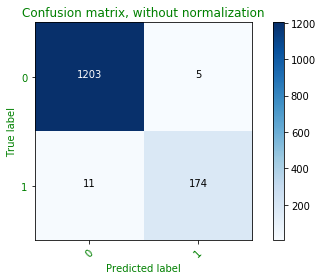

In [329]:
# From Scikit-Learn Documentation

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,color='green')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,color='green')
    plt.yticks(tick_marks, classes,color='green')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',color='green')
    plt.xlabel('Predicted label',color='green')
    plt.tight_layout()


# Compute confusion matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['0','1'],
                      title='Confusion matrix, without normalization')

plt.show()

Basic terminology

    True Positives (TP): we correctly predicted that they are SPAM
    True Negatives (TN): we correctly predicted that they are not SPAM becuase are HAM
    False Positives (FP): we incorrectly predicted that they are SPAM (a "Type I error")
    False Negatives (FN): we incorrectly predicted that they are not SPAM (a "Type II error")


In [330]:
# save confusion matrix and slice into four pieces

confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [331]:
# Classification Accuracy

(TP + TN) / (TP + TN + FP + FN)

0.9885139985642498

In [332]:
# Classification Error

(FP + FN) / (TP + TN + FP + FN)

0.01148600143575018

In [333]:
# Sensitivity: True Positive Rate or Recall

TP / (TP + FN)

0.9405405405405406

In [334]:
# Specificity: True Negative Rate

TN / (TN + FP)

0.9958609271523179

In [335]:
# False Positive Rate

FP / (TN + FP)

0.0041390728476821195

In [336]:
# Precision: Precision Predicting Positive Instances

TP / (TP + FP)

0.9720670391061452

In [337]:
# False Positives

X_test[(y_pred == 1) & (y_test == 0)]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [338]:
# False Negatives

X_test[(y_pred == 0) & (y_test == 1)]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [339]:
X_test[3132]

"LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323."

In [340]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]

In [341]:
# AUC is useful even when there is high class imbalance (unlike classification accuracy).
from sklearn import metrics 
metrics.roc_auc_score(y_test, y_pred_prob)

0.9866431000536962

### 6. Comparing Models

Multinomial Naive bayes VS Logistic Regression

In [342]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [343]:
logreg.fit(X_train_dtm,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [344]:
y_pred = logreg.predict(X_test_dtm)

In [345]:
# Calculate Accuracy of class predictions

from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred)

0.9877961234745154

In [346]:
# Null Accuracy

max(y_test.mean(), 1 - y_test.mean()) 

0.8671931083991385

In [347]:
# Confusion Matrix

from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred) 

Confusion matrix, without normalization
[[1207    1]
 [  16  169]]


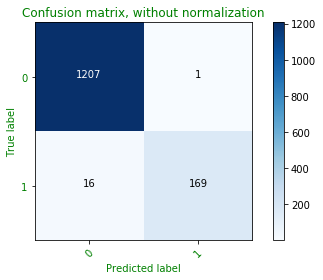

In [348]:
# From Scikit-Learn Documentation

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,color='green')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,color='green')
    plt.yticks(tick_marks, classes,color='green')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',color='green')
    plt.xlabel('Predicted label',color='green')
    plt.tight_layout()


# Compute confusion matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['0','1'],
                      title='Confusion matrix, without normalization')

plt.show()

Basic terminology

    True Positives (TP): we correctly predicted that they are SPAM
    True Negatives (TN): we correctly predicted that they are not SPAM becuase are HAM
    False Positives (FP): we incorrectly predicted that they are SPAM (a "Type I error")
    False Negatives (FN): we incorrectly predicted that they are not SPAM (a "Type II error")


In [349]:
# save confusion matrix and slice into four pieces

confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [350]:
# Classification Accuracy

(TP + TN) / (TP + TN + FP + FN)

0.9877961234745154

In [351]:
# Classification Error

(FP + FN) / (TP + TN + FP + FN)

0.012203876525484566

In [352]:
# Sensitivity: True Positive Rate or Recall

TP / (TP + FN)

0.9135135135135135

In [353]:
# Specificity: True Negative Rate

TN / (TN + FP)

0.9991721854304636

In [354]:
# False Positive Rate

FP / (TN + FP)

0.0008278145695364238

In [355]:
# Precision: Precision Predicting Positive Instances

TP / (TP + FP)

0.9941176470588236

In [356]:
# False Positives

X_test[(y_pred == 1) & (y_test == 0)]

2340    Cheers for the message Zogtorius. Ive been st...
Name: message, dtype: object

In [357]:
# False Negatives

X_test[(y_pred == 0) & (y_test == 1)]

1777                    Call FREEPHONE 0800 542 0578 now!
763     Urgent Ur £500 guaranteed award is still uncla...
3132    LookAtMe!: Thanks for your purchase of a video...
1045    We know someone who you know that fancies you....
684     Hi I'm sue. I am 20 years old and work as a la...
4073    Loans for any purpose even if you have Bad Cre...
1875    Would you like to see my XXX pics they are so ...
4298    thesmszone.com lets you send free anonymous an...
4394    RECPT 1/3. You have ordered a Ringtone. Your o...
4949    Hi this is Amy, we will be sending you a free ...
761     Romantic Paris. 2 nights, 2 flights from £79 B...
3991    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
2821    INTERFLORA - It's not too late to order Inter...
2863    Adult 18 Content Your video will be with you s...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [358]:
X_test[2340]

'Cheers for the message Zogtorius. I\x92ve been staring at my phone for an age deciding whether to text or not.'

In [359]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]

In [360]:
# AUC is useful even when there is high class imbalance (unlike classification accuracy).
from sklearn import metrics 
metrics.roc_auc_score(y_test, y_pred_prob)

0.9866431000536962

### 7. Examining a model for further insight

We will examine the our __trained Naive Bayes Model__ to calculate the approximate 'Spamminess' of each token

___Wich words are spammy?___

In [361]:
# Storing the vocabulary in X_train_tokens

X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

7456

In [362]:
print(X_train_tokens[0:50])

['00', '000', '008704050406', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07090201529', '07090298926', '07123456789', '07732584351', '07734396839', '07742676969', '0776xxxxxxx', '07781482378', '07786200117', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705']


In [363]:
print(X_train_tokens[-50:])

['yer', 'yes', 'yest', 'yesterday', 'yet', 'yetunde', 'yijue', 'ym', 'ymca', 'yo', 'yoga', 'yogasana', 'yor', 'yorge', 'you', 'youdoing', 'youi', 'youphone', 'your', 'youre', 'yourjob', 'yours', 'yourself', 'youwanna', 'yowifes', 'yoyyooo', 'yr', 'yrs', 'ything', 'yummmm', 'yummy', 'yun', 'yunny', 'yuo', 'yuou', 'yup', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zeros', 'zhong', 'zindgi', 'zoe', 'zoom', 'zouk', 'zyada', 'èn', '〨ud']


In [364]:
# Naive bayes counts the number of times each token appears in each class

# character 00 appears 0 times in ham and 5 times in spam
# character zyada appears 1 times in ham and 0 times in spam

nb.feature_count_

array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 5., 23.,  2., ...,  0.,  0.,  0.]])

In [365]:
# Rows: Classes ham spam, Columns: Tokens

nb.feature_count_.shape

(2, 7456)

In [366]:
# Number of times each token appears accros all HAM messages

ham_token_count = nb.feature_count_[0,:]
ham_token_count

array([0., 0., 0., ..., 1., 1., 1.])

In [367]:
# Number of times each token appears accros all SPAM messages

spam_token_count = nb.feature_count_[1,:]
spam_token_count

array([ 5., 23.,  2., ...,  0.,  0.,  0.])

In [368]:
tokens = pd.DataFrame({'token':X_train_tokens,'ham':ham_token_count,'spam':spam_token_count})
tokens.head()

,ham,spam,token
0,0.0,5.0,00
1,0.0,23.0,000
2,0.0,2.0,008704050406
3,0.0,1.0,0121
4,0.0,1.0,01223585236


In [369]:
tokens.set_index('token',inplace=True)
tokens.sample(5, random_state=6)

,ham,spam
token,,
very,64.0,2.0
nasty,1.0,1.0
villa,0.0,1.0
beloved,1.0,0.0
textoperator,0.0,2.0


In [370]:
nb.class_count_

array([3617.,  562.])

In [371]:
tokens.groupby('token')['ham'].mean().sort_values(ascending=False).head(10)

token
you     1442.0
to      1161.0
the      847.0
in       630.0
and      623.0
me       575.0
is       568.0
it       545.0
my       543.0
that     432.0
Name: ham, dtype: float64

In [372]:
tokens.groupby('token')['spam'].mean().sort_values(ascending=False).head(10)

token
to      509.0
call    271.0
you     218.0
your    198.0
free    158.0
for     158.0
the     157.0
now     142.0
or      141.0
txt     114.0
Name: spam, dtype: float64

In [373]:
# Add 1 to ham and spam counts to avoid dividing by 0

tokens['ham'] = tokens['ham'] + 1
tokens['spam'] = tokens['spam'] + 1
tokens.sample(5, random_state=6)

,ham,spam
token,,
very,65.0,3.0
nasty,2.0,2.0
villa,1.0,2.0
beloved,2.0,1.0
textoperator,1.0,3.0


In [374]:
# Convert the ham and spam counts into frequencies

tokens['ham'] = tokens['ham']/nb.class_count_[0]
tokens['spam'] = tokens['spam']/nb.class_count_[1]
tokens.sample(5, random_state=6)

,ham,spam
token,,
very,0.017971,0.005338
nasty,0.000553,0.003559
villa,0.000276,0.003559
beloved,0.000553,0.001779
textoperator,0.000276,0.005338


In [375]:
# Calculate the ratio of spam to ham for each token

tokens['spam_ratio'] = tokens['spam']/tokens['ham']
tokens.sample(5, random_state=6)

,ham,spam,spam_ratio
token,,,
very,0.017971,0.005338,0.297044
nasty,0.000553,0.003559,6.435943
villa,0.000276,0.003559,12.871886
beloved,0.000553,0.001779,3.217972
textoperator,0.000276,0.005338,19.307829


In [376]:
# Examine the DataFrame sorted by spam ratio

tokens.sort_values(by='spam_ratio', ascending=False).head(20)

,ham,spam,spam_ratio
token,,,
claim,0.000276,0.158363,572.798932
prize,0.000276,0.135231,489.131673
150p,0.000276,0.087189,315.361210
tone,0.000276,0.085409,308.925267
guaranteed,0.000276,0.076512,276.745552
18,0.000276,0.069395,251.001779
cs,0.000276,0.065836,238.129893
www,0.000553,0.129893,234.911922
1000,0.000276,0.056940,205.950178


In [377]:
# Look up the spam ratio for a given token

tokens.loc['dating','spam_ratio']

83.66725978647686

### 8. Tuning the vectorizer (discussion)

In [379]:
# 2:26